In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_decomposition import CCA

In [14]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df =df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
X = df[['bill_length_mm','bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [15]:
Y = df[['flipper_length_mm','body_mass_g']]
Y.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


In [64]:
#normalize
X_mc = (X-X.mean())/(X.std())
Y_mc = (Y-Y.mean())/(Y.std())

In [17]:
#This performs CCA - see https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html
ca = CCA()
ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

In [65]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "Species":df.species.tolist(),
                      "Island":df.island.tolist(),
                      "sex":df.sex.tolist()})

In [66]:
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Species,Island,sex
0,-1.186252,-1.408795,-0.010367,0.682866,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-0.456036,0.429879,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,-0.130809,-0.839620,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,-0.073623,-0.458571,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,0.736248,-0.014204,Adelie,Torgersen,MALE


In [67]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])


array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

In [55]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.        , 0.08638695],
       [0.08638695, 1.        ]])

Text(0.5, 1.0, 'Comp. 1, corr = 0.79')

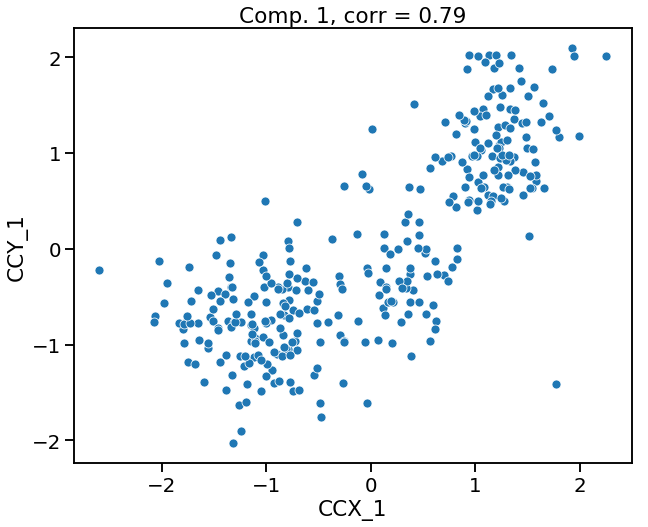

In [56]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'Comp. 1, corr = 0.09')

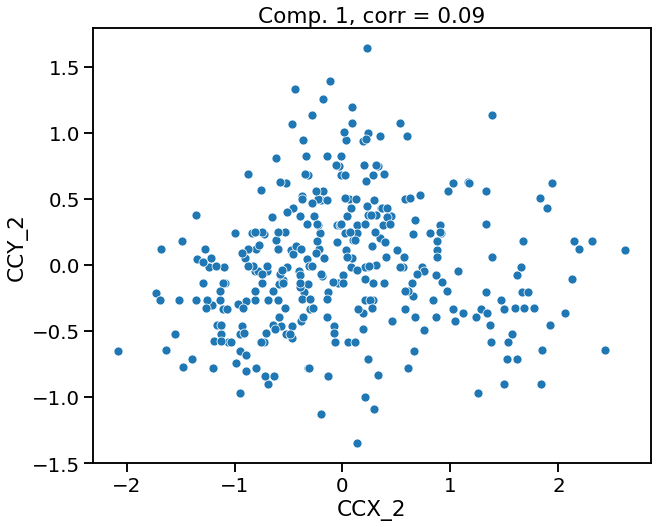

In [57]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.79')

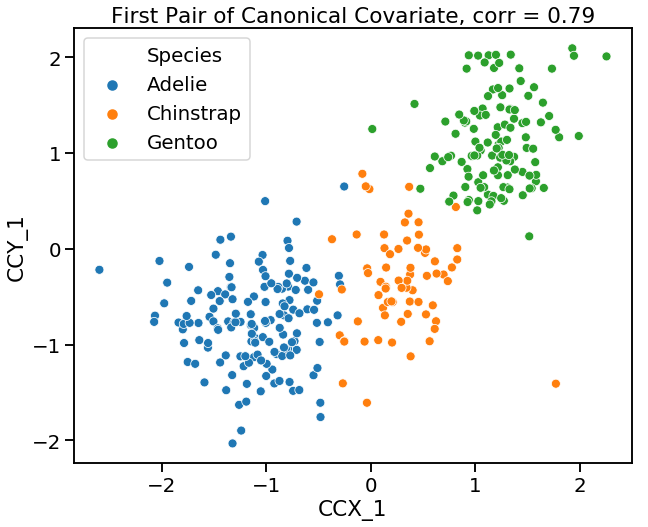

In [68]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

In [142]:
# We want to find the vectors that define the canonical correlations
# As far as I can see, these are not given by the code, but they are easy to find.
X_new = X_c[0:2,:]
X_old = X_mc.to_numpy()[0:2,:]

#The colums of P give the canonical coordinates in X
P = np.linalg.inv(X_old) @ X_new

In [157]:
print(P)

[[ 0.77117071  0.66390065]
 [-0.63662841  0.74865652]]


In [159]:
#The columns are not orthogonal
print(np.dot(P[:,0], P[:,1]))

0.03536471949262299


In [167]:
#The second canonical variabe is uncorrelated with the first however.
print(np.dot(X_c[:,0], X_c[:,1]))

-9.059419880941277e-14
